In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# %cd '/content/drive/MyDrive/WEB_ANALYTICS/FINAL PROJECT/'

In [4]:
import requests
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go

In [5]:
# !pip install streamlit pyvis networkx pandas

# **1.** Get the data from Ticketmaster API


In [6]:
# Ticketmaster API key
API_KEY = 'I5pqLs6uAYeFww88GANmvm7yr2YOiklZ'
url = 'https://app.ticketmaster.com/discovery/v2/events.json'

# Parameters for the API request
params = {
    'apikey': API_KEY,
    'countryCode': 'ES',  # Spain
    'size': 200  # Number of events per request (max 200)
}

# Make the request to Ticketmaster API
response = requests.get(url, params=params)
data = response.json()

print(data)

{'_embedded': {'events': [{'name': 'Paul McCartney: GOT BACK TOUR', 'type': 'event', 'id': 'Z698xZ2qZa17W', 'test': False, 'url': 'https://www.ticketmaster.es/event/paul-mccartney-got-back-tour-tickets/41277?language=en-us', 'locale': 'en-us', 'images': [{'ratio': '16_9', 'url': 'https://s1.ticketm.net/dam/a/d36/7a1cf601-19aa-4db2-8bf0-f8262d48cd36_RECOMENDATION_16_9.jpg', 'width': 100, 'height': 56, 'fallback': False}, {'ratio': '16_9', 'url': 'https://s1.ticketm.net/dam/a/ac1/3bc6b045-e04f-4520-b1de-b552e2b1cac1_SOURCE', 'width': 2426, 'height': 1365, 'fallback': False}, {'ratio': '16_9', 'url': 'https://s1.ticketm.net/dam/a/d36/7a1cf601-19aa-4db2-8bf0-f8262d48cd36_RETINA_PORTRAIT_16_9.jpg', 'width': 640, 'height': 360, 'fallback': False}, {'url': 'https://s1.ticketm.net/dam/a/d36/7a1cf601-19aa-4db2-8bf0-f8262d48cd36_SOURCE', 'width': 1738, 'height': 2480, 'fallback': False}, {'ratio': '16_9', 'url': 'https://s1.ticketm.net/dam/a/ac1/3bc6b045-e04f-4520-b1de-b552e2b1cac1_TABLET_LANDSC

In [7]:
# Pretty-print the first few lines of the API response
print(json.dumps(data, indent=4)[:2000])


# json.dumps(): is a function that converts Python object into a JSON-formatted string.
# the indent parameter just adds indentation to the nested structures.
# [:2000] slice that takes the first 2000 characters of the JSON string.

{
    "_embedded": {
        "events": [
            {
                "name": "Paul McCartney: GOT BACK TOUR",
                "type": "event",
                "id": "Z698xZ2qZa17W",
                "test": false,
                "url": "https://www.ticketmaster.es/event/paul-mccartney-got-back-tour-tickets/41277?language=en-us",
                "locale": "en-us",
                "images": [
                    {
                        "ratio": "16_9",
                        "url": "https://s1.ticketm.net/dam/a/d36/7a1cf601-19aa-4db2-8bf0-f8262d48cd36_RECOMENDATION_16_9.jpg",
                        "width": 100,
                        "height": 56,
                        "fallback": false
                    },
                    {
                        "ratio": "16_9",
                        "url": "https://s1.ticketm.net/dam/a/ac1/3bc6b045-e04f-4520-b1de-b552e2b1cac1_SOURCE",
                        "width": 2426,
                        "height": 1365,
                    

In [8]:
# Remove the 'images' key from the each event retrieved
data_no_images = data.copy()

# Check key='_embedded' is in the data dictionary and also the key='events' is also inside the '_embedded' dictionary
if "_embedded" in data and "events" in data["_embedded"]:
    # Iterate through all the events
    for event in data["_embedded"]["events"]:
        # Remove the key='images' for the event, and if the key does not exist, then return None and nothing happens.
        event.pop("images", None)

# Pretty-print the cleaned-up response
print(json.dumps(data, indent=4)[:5000])

{
    "_embedded": {
        "events": [
            {
                "name": "Paul McCartney: GOT BACK TOUR",
                "type": "event",
                "id": "Z698xZ2qZa17W",
                "test": false,
                "url": "https://www.ticketmaster.es/event/paul-mccartney-got-back-tour-tickets/41277?language=en-us",
                "locale": "en-us",
                "sales": {
                    "public": {
                        "startDateTime": "2024-06-21T08:00:00Z",
                        "startTBD": false,
                        "startTBA": false,
                        "endDateTime": "2024-12-09T20:00:00Z"
                    }
                },
                "dates": {
                    "start": {
                        "localDate": "2024-12-09",
                        "localTime": "21:00:00",
                        "dateTime": "2024-12-09T20:00:00Z",
                        "dateTBD": false,
                        "dateTBA": false,
                 

In [9]:
# This function prints the keys and types of values at each level.
def print_json_structure(data, indent=0):

    '''
    Arguments:
    - data: input data
    - indent: number of spaces to indent each level
    '''

    # Check the input data is a dictionary
    if isinstance(data, dict):
        # Iterate over the key-value pairs inside the dictionary
        for key, value in data.items():
            # Print the current key and its value type
            print("  " * indent + f"- {key}: {type(value).__name__}")
            # Recursively call this function so the same process is done over the values (values could also be dictionaries or lists)
            print_json_structure(value, indent + 1)
    # Check if the input data is a list
    elif isinstance(data, list):
        # Print the number of elements contained in the list
        print("  " * indent + f"- List of {len(data)} items:")
        # Check if there are multiple elements in the list
        if len(data) > 0:
            # If so, recursively call this function so the same process is done over the elements of the list (these elements could also be dictionaries or lists)
            print_json_structure(data[0], indent + 1)
    # Input data is neither a dictionary nor a list
    else:
        # Print the type of that value
        print("  " * indent + f"- Value: {type(data).__name__}")

# Call the function on your data
print_json_structure(data_no_images)

- _embedded: dict
  - events: list
    - List of 188 items:
      - name: str
        - Value: str
      - type: str
        - Value: str
      - id: str
        - Value: str
      - test: bool
        - Value: bool
      - url: str
        - Value: str
      - locale: str
        - Value: str
      - sales: dict
        - public: dict
          - startDateTime: str
            - Value: str
          - startTBD: bool
            - Value: bool
          - startTBA: bool
            - Value: bool
          - endDateTime: str
            - Value: str
      - dates: dict
        - start: dict
          - localDate: str
            - Value: str
          - localTime: str
            - Value: str
          - dateTime: str
            - Value: str
          - dateTBD: bool
            - Value: bool
          - dateTBA: bool
            - Value: bool
          - timeTBA: bool
            - Value: bool
          - noSpecificTime: bool
            - Value: bool
        - timezone: str
          

In [10]:
# Initialize empty lists for each individual dataframe
artists = []
venues = []
genres = []
events = []
price_ranges = []
seat_maps = []
cities = []

# Extract data from each one of the events
for event in data_no_images.get('_embedded', {}).get('events', []):

    # Events
    events.append({
        'event_id': event.get('id'),
        'name': event.get('name'),
        'type': event.get('type'),
        'url': event.get('url'),
        'locale': event.get('locale'),
        'start_date': event.get('dates', {}).get('start', {}).get('localDate'),
        'end_date': event.get('sales', {}).get('public', {}).get('endDateTime'),
        'timezone': event.get('dates', {}).get('timezone'),
        'status': event.get('dates', {}).get('status', {}).get('code'),
        'span_multiple_days': event.get('dates', {}).get('spanMultipleDays'),
        'venue_id': event.get('_embedded', {}).get('venues', [{}])[0].get('id')
    })

    # Venues
    for venue in event.get('_embedded', {}).get('venues', []):
        venues.append({
            'venue_id': venue.get('id'),
            'name': venue.get('name'),
            'city': venue.get('city', {}).get('name'),
            'state': venue.get('state', {}).get('name'),
            'country': venue.get('country', {}).get('name'),
            'address': venue.get('address', {}).get('line1'),
            'postalCode': venue.get('postalCode'),
            'latitude': venue.get('location', {}).get('latitude'),
            'longitude': venue.get('location', {}).get('longitude'),
            'upcomingEvents': venue.get('upcomingEvents', {}).get('_total')
        })

    # Artists
    for artist in event.get('_embedded', {}).get('attractions', []):
        artists.append({
            'artist_id': artist.get('id'),
            'name': artist.get('name'),
            'type': artist.get('type'),
            'locale': artist.get('locale'),
            'external_links': artist.get('externalLinks', {})
        })

    # Genres
    for classification in event.get('classifications', []):
        genres.append({
            'genre_id': classification.get('genre', {}).get('id'),
            'genre_name': classification.get('genre', {}).get('name'),
            'sub_genre_id': classification.get('subGenre', {}).get('id'),
            'sub_genre_name': classification.get('subGenre', {}).get('name')
        })

    # Cities
    for venue in event.get('_embedded', {}).get('venues', []):
      cities.append({
          'city_id': venue.get('id'),  # Get the venue ID
          'name': venue.get('city', {}).get('name')  # Get the city name
      })


    # Price Ranges
    for price in event.get('priceRanges', []):
        price_ranges.append({
            'event_id': event.get('id'),
            'type': price.get('type'),
            'currency': price.get('currency'),
            'min_price': price.get('min'),
            'max_price': price.get('max')
        })

    # Seat Maps
    if event.get('seatmap'):
        seat_maps.append({
            'event_id': event.get('id'),
            'static_url': event.get('seatmap', {}).get('staticUrl')
        })

# Convert lists to DataFrames
df_events = pd.DataFrame(events)
df_venues = pd.DataFrame(venues)
df_artists = pd.DataFrame(artists)
df_genres = pd.DataFrame(genres).drop_duplicates()
df_price_ranges = pd.DataFrame(price_ranges)
df_seat_maps = pd.DataFrame(seat_maps)
df_cities = pd.DataFrame(cities)


In [11]:
print('events')
# ignore url column in print
print(df_events.head())

print('venues')
print(df_venues.head())

print('artists')
print(df_artists.head())

print('genres')
print(df_genres.head())

print('price_ranges')
print(df_price_ranges.head())

print('seat_maps')
print(df_seat_maps.head())

print('cities')
print(df_cities.head())

events
        event_id                                             name   type  \
0  Z698xZ2qZa17W                    Paul McCartney: GOT BACK TOUR  event   
1  Z698xZ2qZa1Ad                    Paul McCartney: GOT BACK TOUR  event   
2  Z698xZ2qZa13A  Imagine Dragons: LOOM World Tour | VIP Packages  event   
3  Z698xZ2qZa18q                 Imagine Dragons: LOOM World Tour  event   
4  Z698xZ2qZa13R  Imagine Dragons: LOOM World Tour | VIP Packages  event   

                                                 url locale  start_date  \
0  https://www.ticketmaster.es/event/paul-mccartn...  en-us  2024-12-09   
1  https://www.ticketmaster.es/event/paul-mccartn...  en-us  2024-12-10   
2  https://www.ticketmaster.es/event/imagine-drag...  en-us  2025-06-28   
3  https://www.ticketmaster.es/event/imagine-drag...  en-us  2025-06-28   
4  https://www.ticketmaster.es/event/imagine-drag...  en-us  2025-07-01   

               end_date       timezone  status  span_multiple_days  \
0  2024-12-09T2

In [12]:
# size of each of the dfs
print('events')
print(df_events.shape)

print('venues')
print(df_venues.shape)

print('artists')
print(df_artists.shape)

print('genres')
print(df_genres.shape)

print('price_ranges')
print(df_price_ranges.shape)

print('seat_maps')
print(df_seat_maps.shape)

print('cities')
print(df_cities.shape)

events
(188, 11)
venues
(188, 10)
artists
(226, 5)
genres
(11, 4)
price_ranges
(376, 5)
seat_maps
(38, 2)
cities
(188, 2)


In [13]:
# save all df to data/ folder
df_events.to_csv('data/events.csv', index=False)
df_venues.to_csv('data/venues.csv', index=False)
df_artists.to_csv('data/artists.csv', index=False)
df_genres.to_csv('data/genres.csv', index=False)
df_price_ranges.to_csv('data/price_ranges.csv', index=False)
df_seat_maps.to_csv('data/seat_maps.csv', index=False)
df_cities.to_csv('data/cities.csv', index=False)

# **2.** City - Event Type Graph

### **Goal:** see the event type preferences across multiple cities.

#### **Nodes**
- **City Nodes**
  - `city_name`: The name of the city.
  
- **Genre Nodes**
  - `eventtype_name`: The genre of the event.

#### **Edges (Relationships)**
- **City-Event Type Relationship**
  - `city_name`: Links each city to their associated event type(s).
  - `genre_name`: Links each genre to its associated city.

## **2.1** Prepare the data for the graph

In [14]:
# Initialize empty list
cities_genres = []

# Iterate over the events
for event in data_no_images.get('_embedded', {}).get('events', []):

    # Extract the name of the event, and if it does not exist write 'Unknown'
    event_name = event.get('name', 'Unknown')

    # Iterate over the venues of each event to extract the city name
    for venue in event.get('_embedded', {}).get('venues', []):

        # Extract the city name, and if it does not exist write 'Unknown'
        city_name = venue.get('city', {}).get('name', 'Unknown')

        # Iterate over the genre of each event and extract its name
        for classification in event.get('classifications', []):

            # Extract the segment, and if it does not exist write 'Unknown'
            segment_name = classification.get('segment', []).get('name', 'Unknown')

            genre_name = classification.get('genre', {}).get('name', 'Unknown')  # Extract the name of the genre

            # Append city, genre, and event name
            cities_genres.append({
                'city': city_name,
                'segment': segment_name,
                'genre': genre_name,
                'event_name': event_name
            })

# Convert to DataFrame
df_cities_genres = pd.DataFrame(cities_genres)

# Print the resulting DataFrame
df_cities_genres.head()

# Save the dataframe as a csv
df_cities_genres.to_csv('data/cities_genres.csv', index=False)

In [15]:
# Print the resulting DataFrame
df_cities_genres.head()

,city,segment,genre,event_name
0,Madrid,Music,Rock,Paul McCartney: GOT BACK TOUR
1,Madrid,Music,Rock,Paul McCartney: GOT BACK TOUR
2,Madrid,Music,Rock,Imagine Dragons: LOOM World Tour | VIP Packages
3,Madrid,Music,Rock,Imagine Dragons: LOOM World Tour
4,Barcelona,Music,Rock,Imagine Dragons: LOOM World Tour | VIP Packages


## **2.2** Create the graph using NetworkX library

In [16]:
# Initialize a bipartite graph
B = nx.Graph()

# Iterate over the rows in the dataset
for index, row in df_cities_genres.iterrows():

    # Extract value of the city column in the current row
    city = row['city']

    # Extract value of the genre column in the current row
    type_event = row['segment']

    # Extract value of the event column in the current row
    genre = row['genre']

    # Add city and genre nodes
    B.add_node(city, type='city')
    B.add_node(genre, type='genre')

    # Add edgea between city and genre
    #B.add_edge(city, type_event)

    # Add event name node and connect it to the genre
    #B.add_node(genre, type='genre')  # Event node
    B.add_edge(city, genre)

In [17]:
# Draw the graph

# Layout for the graph
pos = nx.spring_layout(B)

# Specify the color of each of the nodes in the graph iterating over them
node_colors = [
    'skyblue' if B.nodes[node]['type'] == 'city' else
    'lightgreen' if B.nodes[node]['type'] == 'genre' else
    'salmon'
    for node in B.nodes
]

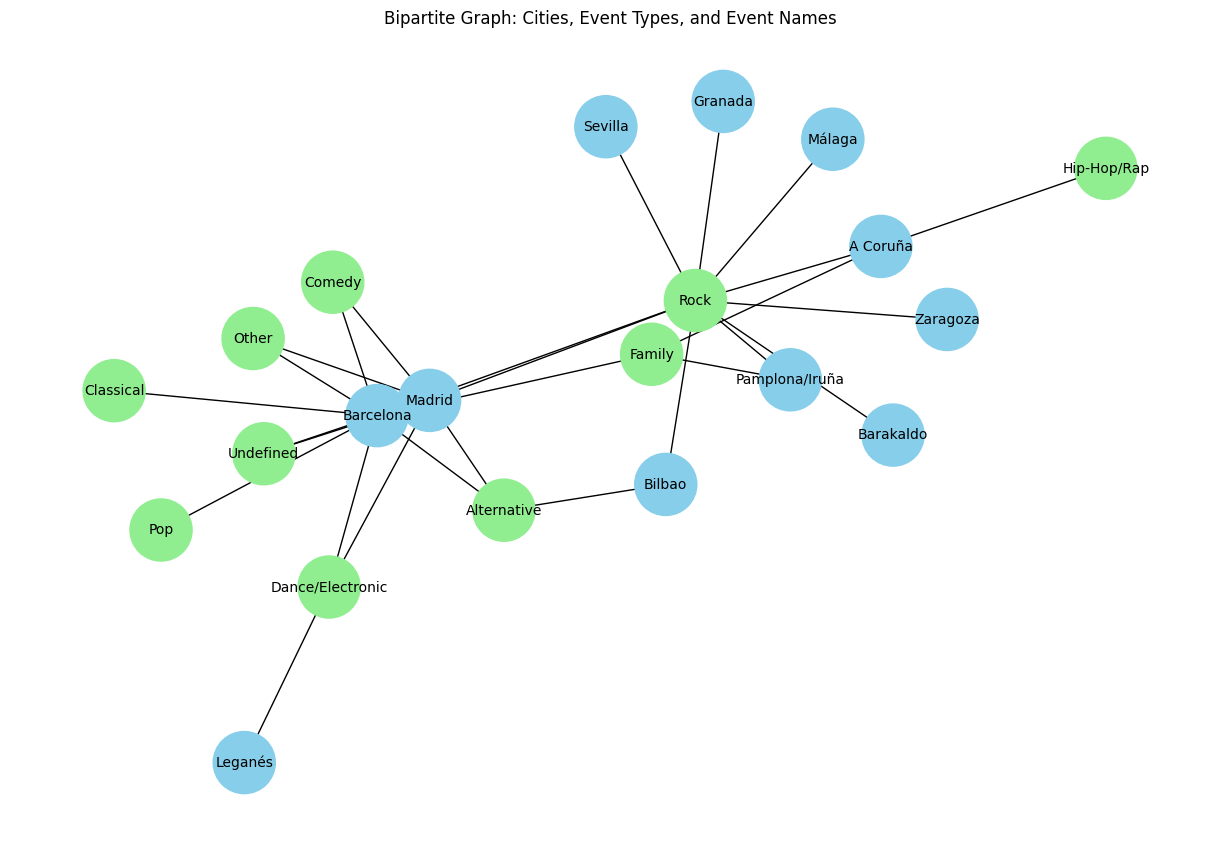

In [18]:
# Create the plot
plt.figure(figsize=(12, 8))
nx.draw(
    B,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=2000,
    font_size=10,
    font_color='black'
)

plt.title("Bipartite Graph: Cities, Event Types, and Event Names")
plt.show()

## **2.3** Draw a more interactive graph

In [19]:
def interactive_plot(G):
    # Get positions for nodes
    pos = nx.spring_layout(G)

    # Prepare node traces for Plotly
    node_x = []
    node_y = []
    node_labels = []
    node_hover = []
    node_colors = []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

        # Check node type and assign hover text and color accordingly
        if G.nodes[node].get('type') == 'city':
            node_hover.append(f"City: {node}")
            node_colors.append('skyblue')
        elif G.nodes[node].get('type') == 'genre':
            node_hover.append(f"Genre: {node}")
            node_colors.append('orange')
        else:
            node_hover.append(f"Node: {node}")
            node_colors.append('gray')  # Default color if type is undefined

        # Use the node name as the label
        node_labels.append(node)

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers',
        marker=dict(
            size=10,
            color=node_colors,
            line_width=1
        ),
        text=node_labels,
        hovertext=node_hover,
        hoverinfo="text"
    )

    # Prepare edge traces for Plotly
    edge_x = []
    edge_y = []

    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        line=dict(width=0.5, color="#888"),
        hoverinfo="none",
        mode="lines"
    )

    # Create the Plotly figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title="City-Event Type Interactive Graph",
                        titlefont_size=16,
                        showlegend=False,
                        hovermode="closest",
                        margin=dict(b=0, l=0, r=0, t=40),
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False)
                    ))

        # Return the Plotly figure
        #fig.show()

    return fig

In [20]:
interactive_plot(B)

## **2.4** Compute the graph metrics to get insights

In [21]:
### 1. Event Type Diversity Index
def calculate_diversity_index(graph):
    diversity_index = {}
    for node, data in graph.nodes(data=True):
        if data.get('type') == 'city':  # Focus on city nodes
            event_types = [nbr for nbr in graph.neighbors(node) if graph.nodes[nbr].get('type') == 'genre']
            diversity_index[node] = len(set(event_types))  # Unique event types
    return diversity_index

### 2. Edge Count (Edge Weight)
def calculate_edge_weights(graph):
    edge_weights = Counter()

    # Iterate over city nodes to calculate the number of unique event types for each city
    for node, data in graph.nodes(data=True):
        if data.get('type') == 'city':  # Only focus on city nodes

            # For each event type associated with the city, set the edge weight to 1 (you can modify this logic if needed)
            for nbr in graph.neighbors(node):
                if graph.nodes[nbr].get('type') == 'genre':
                    # Here, we're adding 1 for each unique event type
                    edge_weights[node] += 1

    return edge_weights

### 3. Betweenness Centrality (Event Type Nodes)
def calculate_betweenness_centrality(graph):
    # Calculate betweenness centrality for all nodes
    centrality = nx.betweenness_centrality(graph, normalized=True)
    genre_centrality = {node: centrality[node] for node, data in graph.nodes(data=True) if data.get('type') == 'genre'}
    return genre_centrality

In [22]:
# Compute the metrics
diversity_index = calculate_diversity_index(B)
edge_weights = calculate_edge_weights(B)
betweenness_centrality = calculate_betweenness_centrality(B)

In [23]:
# Display Results
print("1. Event Type Diversity Index (by City):")
for city, diversity in diversity_index.items():
    print(f"City: {city}, Diversity Index: {diversity}")
print(" ")
print("\n2. Edge Weight (Event Count):")
for edge, weight in edge_weights.items():
    print(f"Edge: {edge}, Weight (Event Count): {weight}")
print(" ")
print("\n3. Betweenness Centrality (of Event Types):")
for genre, centrality in betweenness_centrality.items():
    print(f"Genre: {genre}, Betweenness Centrality: {centrality}")

1. Event Type Diversity Index (by City):
City: Madrid, Diversity Index: 6
City: Barcelona, Diversity Index: 9
City: Málaga, Diversity Index: 1
City: A Coruña, Diversity Index: 3
City: Zaragoza, Diversity Index: 1
City: Sevilla, Diversity Index: 1
City: Bilbao, Diversity Index: 2
City: Barakaldo, Diversity Index: 1
City: Pamplona/Iruña, Diversity Index: 2
City: Granada, Diversity Index: 1
City: Leganés, Diversity Index: 1
 

2. Edge Weight (Event Count):
Edge: Madrid, Weight (Event Count): 6
Edge: Barcelona, Weight (Event Count): 9
Edge: Málaga, Weight (Event Count): 1
Edge: A Coruña, Weight (Event Count): 3
Edge: Zaragoza, Weight (Event Count): 1
Edge: Sevilla, Weight (Event Count): 1
Edge: Bilbao, Weight (Event Count): 2
Edge: Barakaldo, Weight (Event Count): 1
Edge: Pamplona/Iruña, Weight (Event Count): 2
Edge: Granada, Weight (Event Count): 1
Edge: Leganés, Weight (Event Count): 1
 

3. Betweenness Centrality (of Event Types):
Genre: Rock, Betweenness Centrality: 0.6046052631578948


In [ ]:
# %cd '/content/drive/MyDrive/WEB_ANALYTICS/FINAL PROJECT/data'

[WinError 3] The system cannot find the path specified: "'/content/drive/MyDrive/WEB_ANALYTICS/FINAL PROJECT/data'"
c:\Users\Monica\Desktop\A_Uni\4º Year\1C\Web Analytics\my labs\final project


c:\Users\Monica\Desktop\A_Uni\4º Year\1C\Web Analytics\my labs\env\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning:

This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.



In [26]:
import streamlit as st
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Load your dataset (replace 'cities_genres.csv' with your actual file)
df_cities_genres = pd.read_csv('data/cities_genres.csv')

# Streamlit UI
st.title("Interactive Bipartite Graph: Cities, Event Types, and Event Names")
st.sidebar.header("Filters")

# Filters
selected_city = st.sidebar.multiselect(
    "Select Cities",
    options=df_cities_genres['city'].unique(),
    default=df_cities_genres['city'].unique()
)

selected_genre = st.sidebar.multiselect(
    "Select Event Types (Genres)",
    options=df_cities_genres['genre'].unique(),
    default=df_cities_genres['genre'].unique()
)

# Filter the DataFrame
filtered_df = df_cities_genres[
    (df_cities_genres['city'].isin(selected_city)) &
    (df_cities_genres['genre'].isin(selected_genre))
]

st.write("Filtered Data:")
st.dataframe(filtered_df)

# Function to create a bipartite graph using the filtered data
def create_bipartite_graph(df):
    B = nx.Graph()

    # Add nodes and edges
    for _, row in df.iterrows():
        city = row['city']
        genre = row['genre']
        event_name = row['event_name']

        # Add nodes
        B.add_node(city, type='city', label=city)
        B.add_node(genre, type='genre', label=genre)
        B.add_node(event_name, type='event', label=event_name)

        # Add edges
        B.add_edge(city, genre)
        B.add_edge(genre, event_name)

    return B

# Generate the graph
graph = create_bipartite_graph(filtered_df)

# Function to visualize the graph with PyVis
def visualize_graph(graph):
    net = Network(height="700px", width="100%", notebook=False)

    for node, data in graph.nodes(data=True):
        node_type = data['type']
        if node_type == 'city':
            net.add_node(node, label=node, color='skyblue')
        elif node_type == 'genre':
            net.add_node(node, label=node, color='lightgreen')
        elif node_type == 'event':
            net.add_node(node, label=node, color='salmon')

    for source, target in graph.edges():
        net.add_edge(source, target)

    # Generate the graph as an HTML file in memory
    net_html = net.generate_html()
    return net_html

# Render the graph and get the HTML
net_html = visualize_graph(graph)

# Display the HTML graph in Streamlit
st.components.v1.html(net_html, height=750)


2024-12-01 23:30:41.127 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 23:30:41.332 
  command:

    streamlit run c:\Users\Monica\Desktop\A_Uni\4º Year\1C\Web Analytics\my labs\env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-01 23:30:41.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 23:30:41.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 23:30:41.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 23:30:41.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 23:30:41.340 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-

DeltaGenerator()